In [ ]:
#Step 1:  Read in the Dataframe  

In [3]:
import pandas as pd
url = "../data/yelp.csv"
yelp = pd.read_csv (url, index_col="business_id")

In [4]:
yelp.head(1)

,date,review_id,stars,text,type,user_id,cool,useful,funny
business_id,,,,,,,,,
9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0


In [ ]:
#Step 2:  Explore cool, useful, funny

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [7]:
feature_cols = ['cool', 'useful', 'funny']

In [ ]:
#If the review gets more stars, that's affirmed with more positive feeling - being cool.
#But if it's just useful or funny that doesn't appear to add to the affirmation.  Interesting.

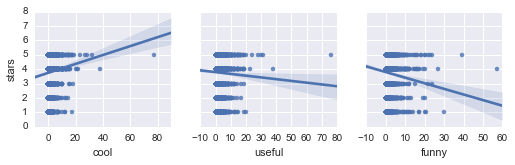

In [10]:
sns.pairplot(yelp, x_vars=feature_cols, y_vars='stars', kind='reg')

In [ ]:
#Step 3:  I may have confused step 3 with step 2.  Either way is working thru the dataset.

In [16]:
yelp.corr()

,stars,cool,useful,funny
stars,1.000000,0.052555,-0.023479,-0.061306
cool,0.052555,1.000000,0.887102,0.764342
useful,-0.023479,0.887102,1.000000,0.723406
funny,-0.061306,0.764342,0.723406,1.000000


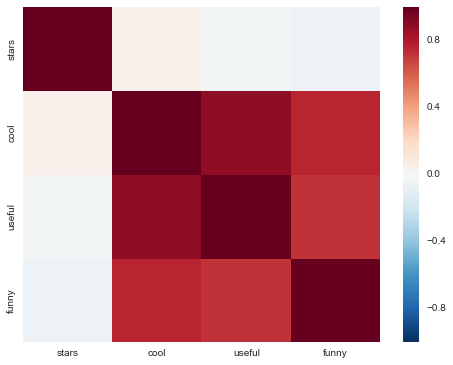

In [17]:
sns.heatmap(yelp.corr())

In [ ]:
#Step 4:  Build a linear regression model and fit it.

In [19]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
feature_cols = ['cool', 'useful', 'funny']

In [21]:
X = yelp[feature_cols]
y = yelp.stars

linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


In [22]:
zip(feature_cols, linreg.coef_)

[('cool', 0.27435946858852994),
 ('useful', -0.14745239099401233),
 ('funny', -0.13567449053706199)]

In [ ]:
#Based on the earlier visualization these coefficients do make sense.  "Cool" is a positive correlation
#while the others are negative, but at lower amounts.  Interesting emotional indicators for sentiment
#analysis possibilities.  I can also see how this might be gamed to 'enhance' the addon effect.

In [ ]:
#Step 5:  Train/Test w/RSME

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

def train_test_rmse(feature_cols):
    x = yelp[feature_cols]
    y = yelp.stars
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    
    y_pred = linreg.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [24]:
print train_test_rmse(['cool', 'useful', 'funny'])

1.17336862742


In [ ]:
#Do I intuitively understand the above value.  Not completely, in all honestly.  

In [25]:
#Step 6:  Removing a feature 

In [26]:
#I decided to remove 'cool' as a feature

In [27]:
feature_cols = ['useful', 'funny']

In [28]:
X = yelp[feature_cols]
y = yelp.stars

linreg = LinearRegression()
linreg.fit(X, y)

print linreg.intercept_
print linreg.coef_

3.78693722032
[ 0.02275916 -0.05919251]


In [29]:
zip(feature_cols, linreg.coef_)

[('useful', 0.022759163006560675), ('funny', -0.059192512106368209)]

In [30]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import numpy as np

def train_test_rmse(feature_cols):
    x = yelp[feature_cols]
    y = yelp.stars
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
    
    linreg = LinearRegression()
    linreg.fit(X_train,y_train)
    
    y_pred = linreg.predict(X_test)
    
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [31]:
print train_test_rmse(['useful', 'funny'])

1.20070113589
